In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Cargar los datasets
train_df = pd.read_csv("train.csv")
val_df   = pd.read_csv("val.csv")
test_df  = pd.read_csv("test.csv")

# Explorar el número de registros
print("Número de registros en Train:", len(train_df))
print("Número de registros en Validation:", len(val_df))
print("Número de registros en Test:", len(test_df))

# Revisar datasets
print("Columnas del dataset:", train_df.columns.tolist())
print("\nEjemplo de Train:\n", train_df.head())

Número de registros en Train: 3334
Número de registros en Validation: 3333
Número de registros en Test: 3333
Columnas del dataset: ['filename', 'Classes', 'Labels']

Ejemplo de Train:
       filename  Classes  Labels
0  1025794.jpg  707-320       0
1  1340192.jpg  707-320       0
2  0056978.jpg  707-320       0
3  0698580.jpg  707-320       0
4  0450014.jpg  707-320       0


In [16]:
# Clases únicas
num_clases = train_df['Labels'].nunique()
print("Número de clases únicas en el dataset:", num_clases)

Número de clases únicas en el dataset: 100


In [17]:
# Distribución de las clases 
train_counts = train_df['Labels'].value_counts().sort_index()
val_counts   = val_df['Labels'].value_counts().sort_index()
test_counts  = test_df['Labels'].value_counts().sort_index()

print("Distribución en Train:\n", train_counts)
print("\nDistribución en Validation:\n", val_counts)
print("\nDistribución en Test:\n", test_counts)

Distribución en Train:
 Labels
0     34
1     33
2     33
3     34
4     33
      ..
95    33
96    34
97    33
98    33
99    34
Name: count, Length: 100, dtype: int64

Distribución en Validation:
 Labels
0     33
1     34
2     33
3     33
4     34
      ..
95    33
96    33
97    34
98    33
99    33
Name: count, Length: 100, dtype: int64

Distribución en Test:
 Labels
0     33
1     33
2     34
3     33
4     33
      ..
95    34
96    33
97    33
98    34
99    33
Name: count, Length: 100, dtype: int64


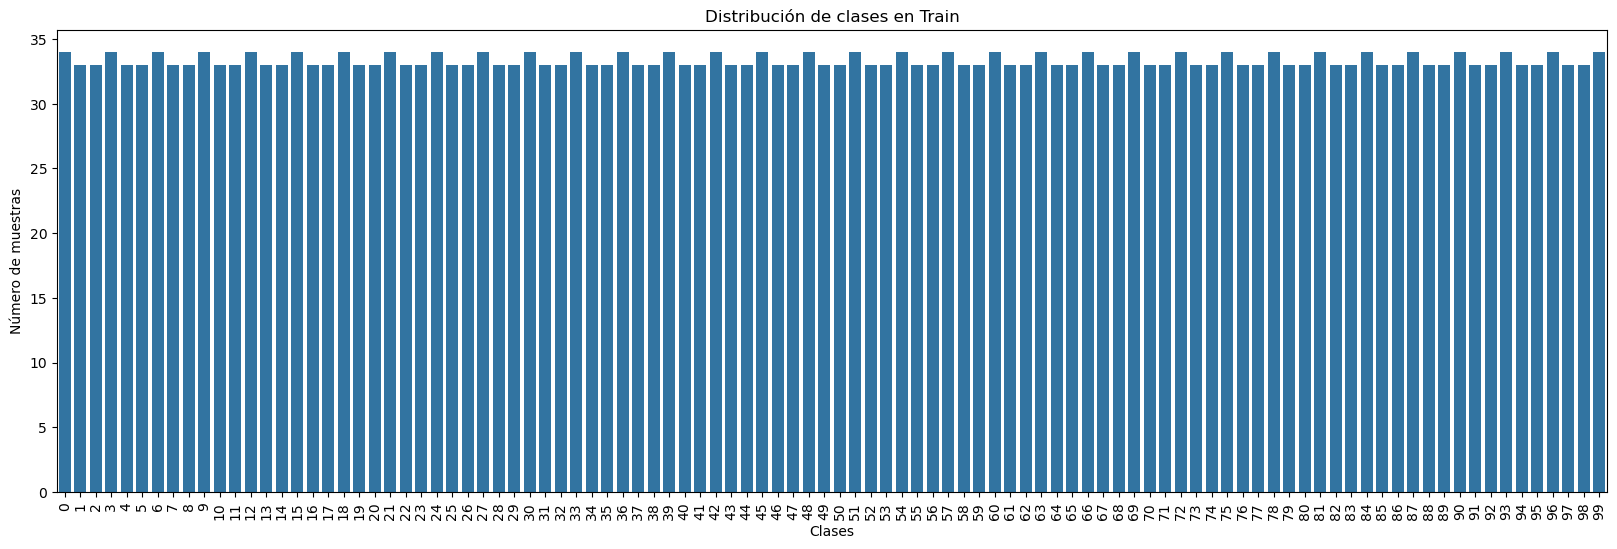

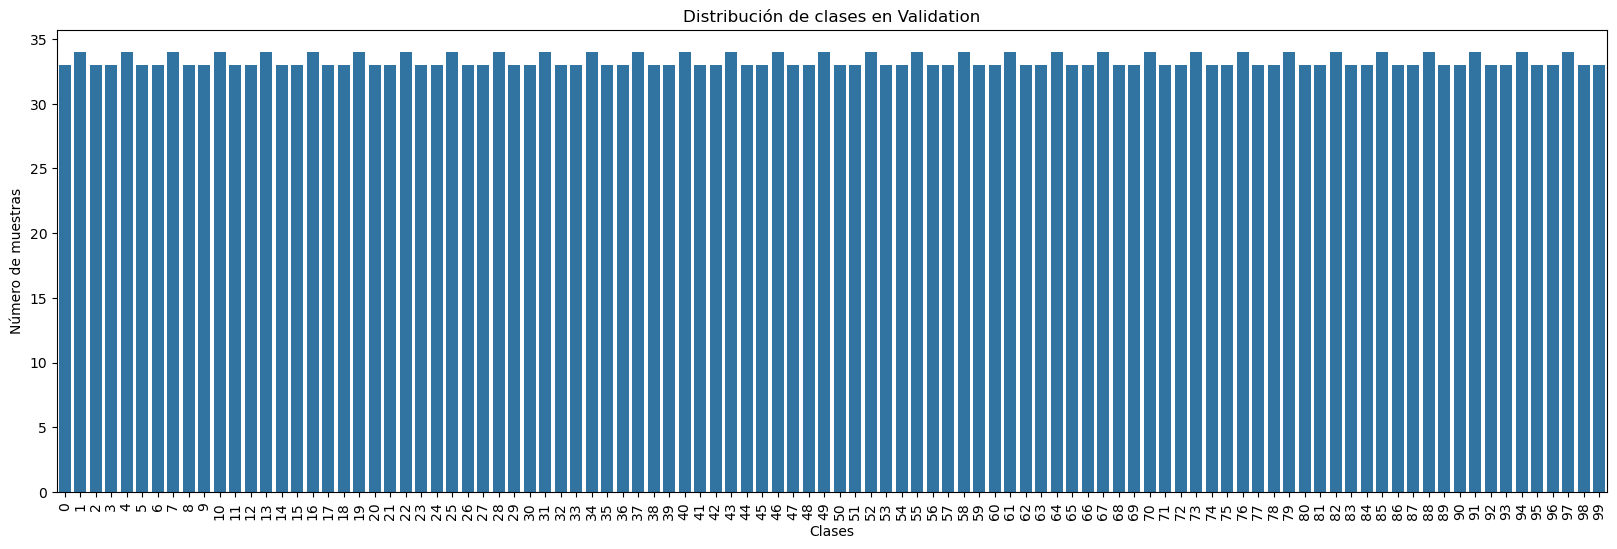

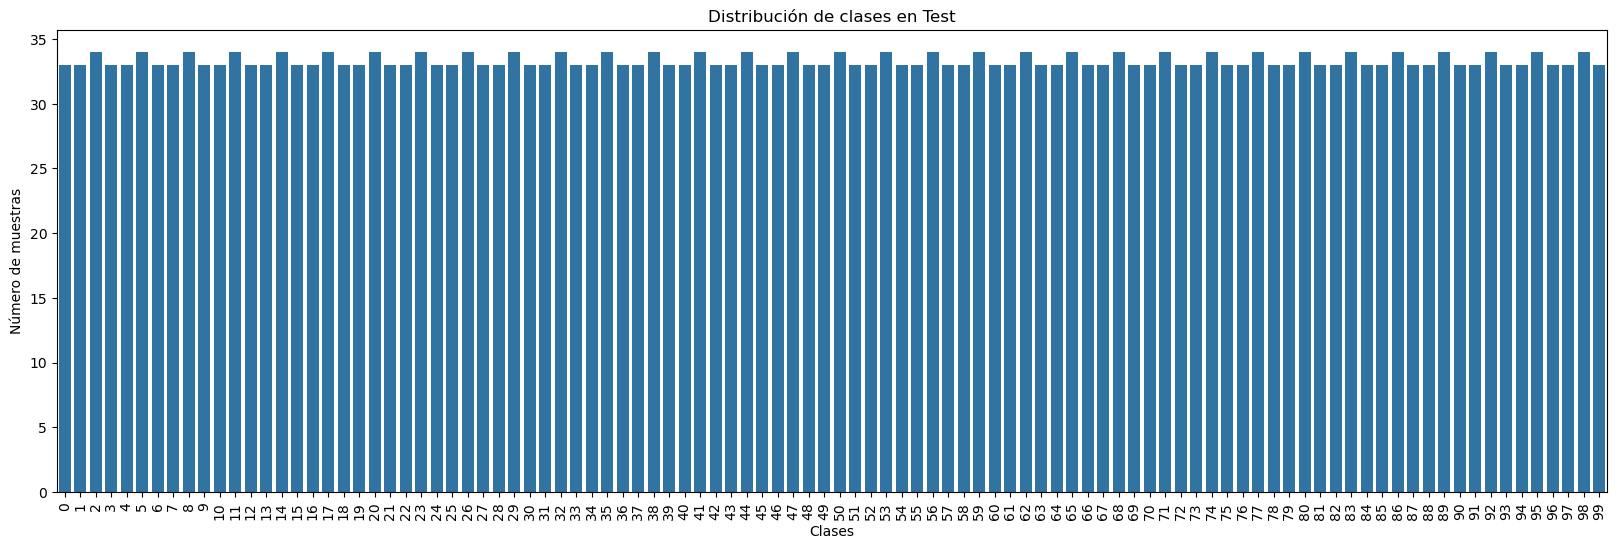

In [22]:
def plot_distribution(counts, title):
    plt.figure(figsize=(20,6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(title)
    plt.xlabel("Clases")
    plt.ylabel("Número de muestras")
    plt.xticks(rotation=90)
    plt.show()

# Plot Train
plot_distribution(train_counts, "Distribución de clases en Train")

# Plot Validation
plot_distribution(val_counts, "Distribución de clases en Validation")

# Plot Test
plot_distribution(test_counts, "Distribución de clases en Test")

### Approach: 70% Train, 20% Test, 10% Val

In [21]:
# Cargar los datasets
new_train_df = pd.read_csv("new_train.csv")
new_val_df   = pd.read_csv("new_val.csv")
new_test_df  = pd.read_csv("new_test.csv")

# Explorar el número de registros
print("Número de registros en Train:", len(new_train_df))
print("Número de registros en Test:", len(new_test_df))
print("Número de registros en Validation:", len(new_val_df))

Número de registros en Train: 7000
Número de registros en Test: 2000
Número de registros en Validation: 1000


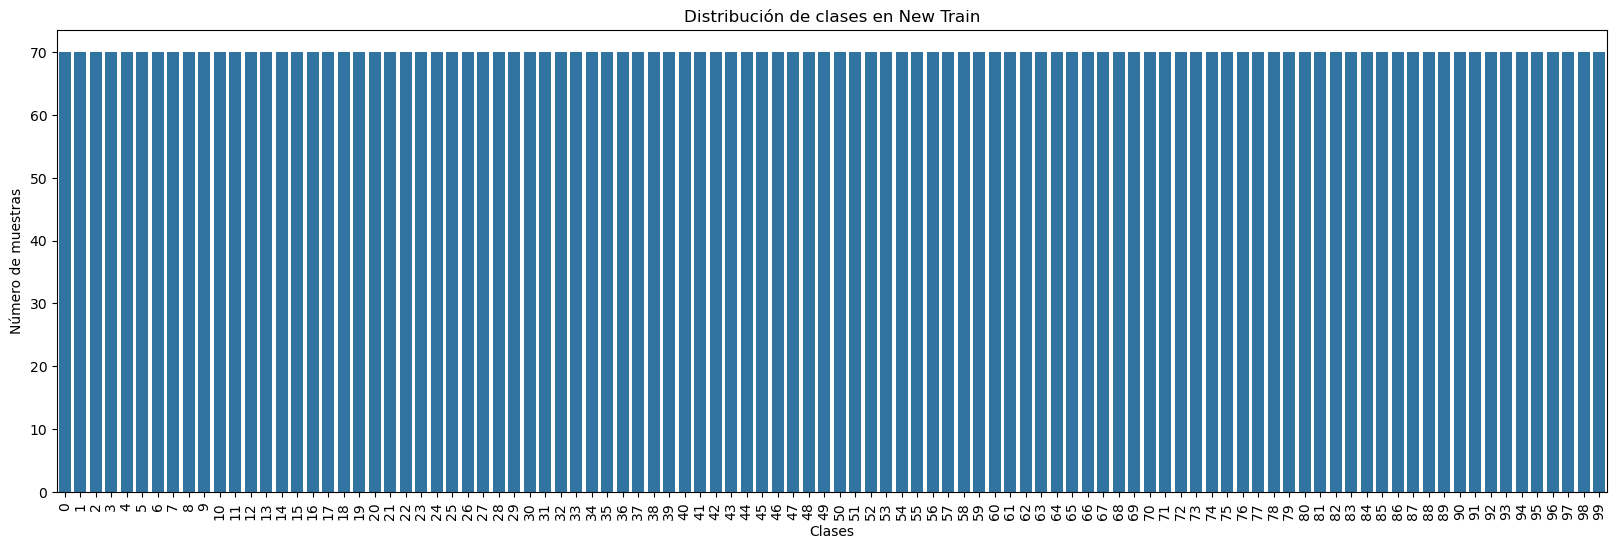

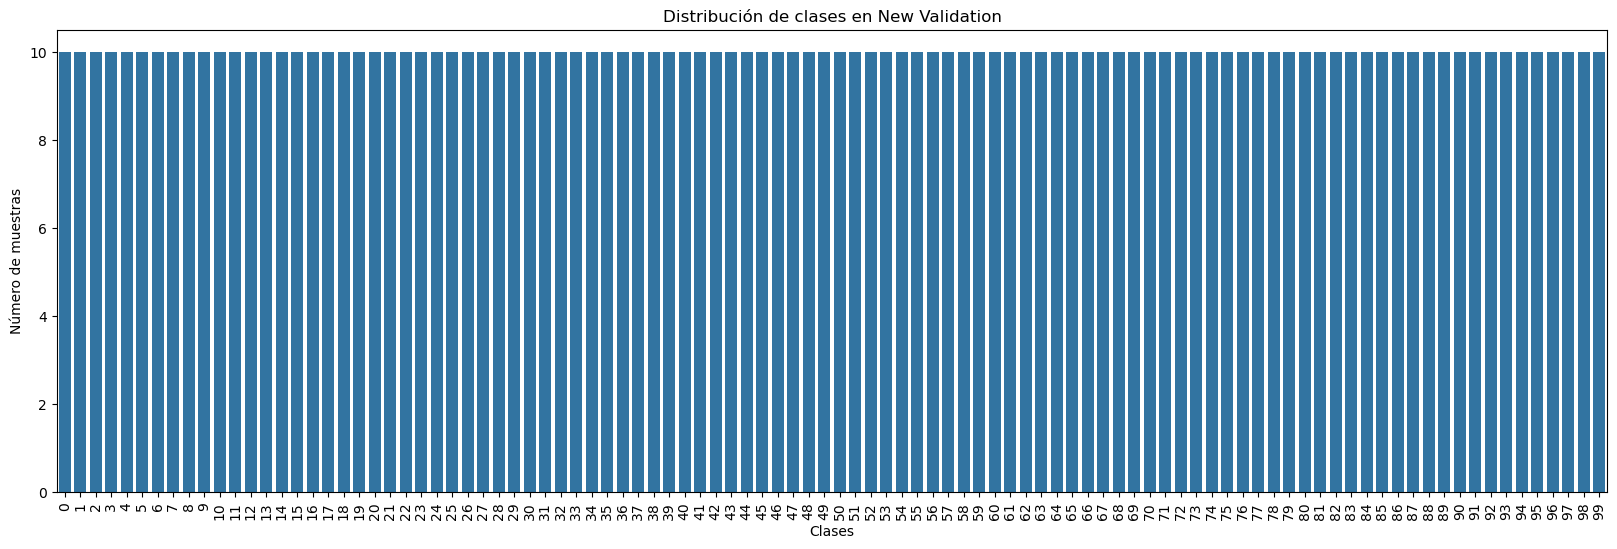

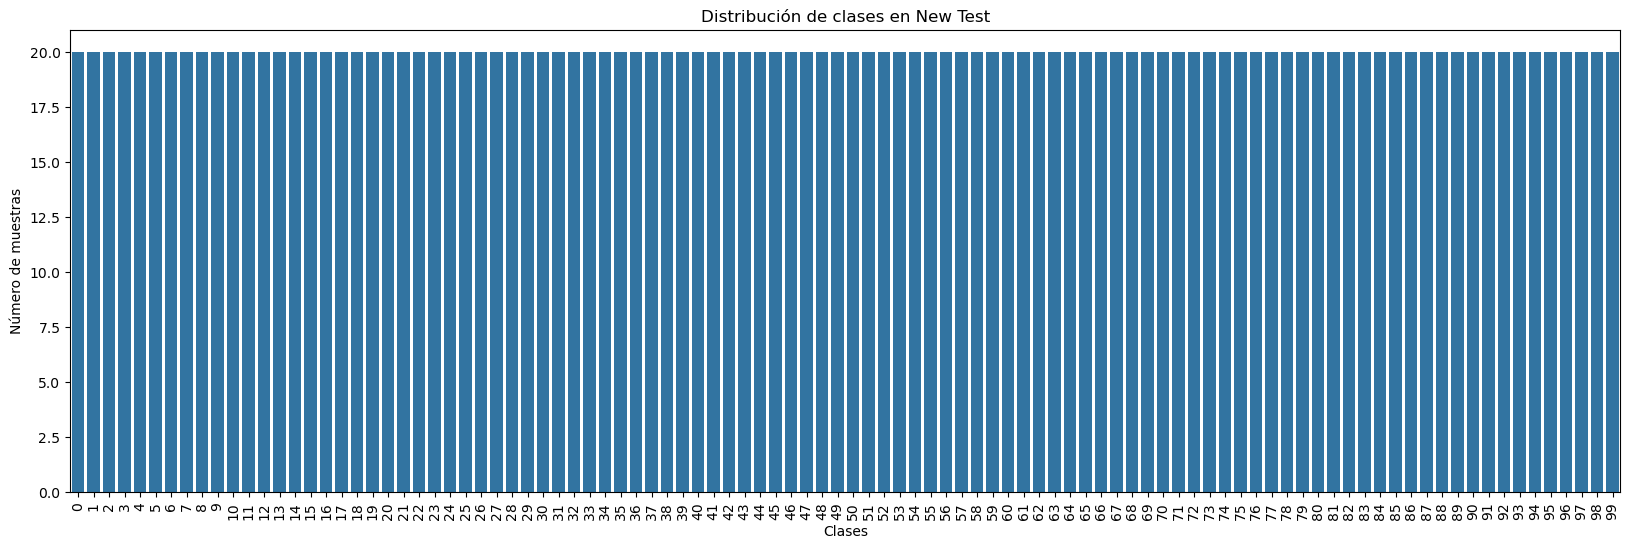

In [23]:
train_counts = new_train_df['Labels'].value_counts().sort_index()
val_counts   = new_val_df['Labels'].value_counts().sort_index()
test_counts  = new_test_df['Labels'].value_counts().sort_index()

# Plot Train
plot_distribution(train_counts, "Distribución de clases en New Train")

# Plot Validation
plot_distribution(val_counts, "Distribución de clases en New Validation")

# Plot Test
plot_distribution(test_counts, "Distribución de clases en New Test")

### Métricas

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Cargar métricas desde archivo JSON
with open("model_resnet18/training_history_resnet18.json", "r") as f:
    metrics = json.load(f)

# Convertir a DataFrame
df = pd.DataFrame(metrics)
df.head()

plt.figure(figsize=(8,5))
plt.plot(df["train_loss"], label="Train Loss")
plt.plot(df["eval_loss"], label="Eval Loss")
plt.title("Evolución de Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

ValueError: All arrays must be of the same length